# Heart Failure Prediction 
[Heart Failure Prediction Dataset](https://www.kaggle.com/fedesoriano/heart-failure-prediction)
<img src="https://www.farukmedicalcity.com/wp-content/uploads/2018/04/Cardiology.jpg">

# Table of Contents :
* [***Data Dictionary***](#dd)
* [***Exploratory Data Analysis***](#ExploratoryDataAnalysis)
* [***Preprocessing***](#pp)
* [***Training Machine Learning Models***](#ml)
* [***Model Comparison***](#mc)
* [***HyperParameter Tuning***](#ht)
* [***Evaluation***](#ev)



## DATA DICTONARY<a class="anchor" id="dd"></a>
* ***Age***: Age of the patient [years]
* ***Sex***: Sex of the patient [M: Male, F: Female]
* ***ChestPainType***: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* ***RestingBP***: Resting blood pressure [mm Hg]
* ***Cholesterol***: Serum cholesterol [mm/dl]
* ***FastingBS***: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* ***RestingECG***: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* ***MaxHR***: Maximum heart rate achieved [Numeric value between 60 and 202]
* ***ExerciseAngina***: Exercise-induced angina [Y: Yes, N: No]
* ***Oldpeak***: ST [Numeric value measured in depression]
* ***ST_Slope***: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* ***HeartDisease***: Output class [1: heart disease, 0: Normal]

# Exploratory Data Analysis<a class="anchor" id="ExploratoryDataAnalysis"></a>




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split,cross_validate,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,plot_tree
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report
import optuna
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
print(f"""Percentage of patient had a HeartDisease:  {round(df.HeartDisease.value_counts(normalize=True)[1]*100,2)} %  --> ({df.HeartDisease.value_counts()[1]} patient)
Percentage of patient did not have a HeartDisease: {round(df.HeartDisease.value_counts(normalize=True)[0]*100,2)} %  --> ({df.HeartDisease.value_counts()[0]} patient)""")

Percentage of patient had a HeartDisease:  55.34 %  --> (508 patient)
Percentage of patient did not have a HeartDisease: 44.66 %  --> (410 patient)


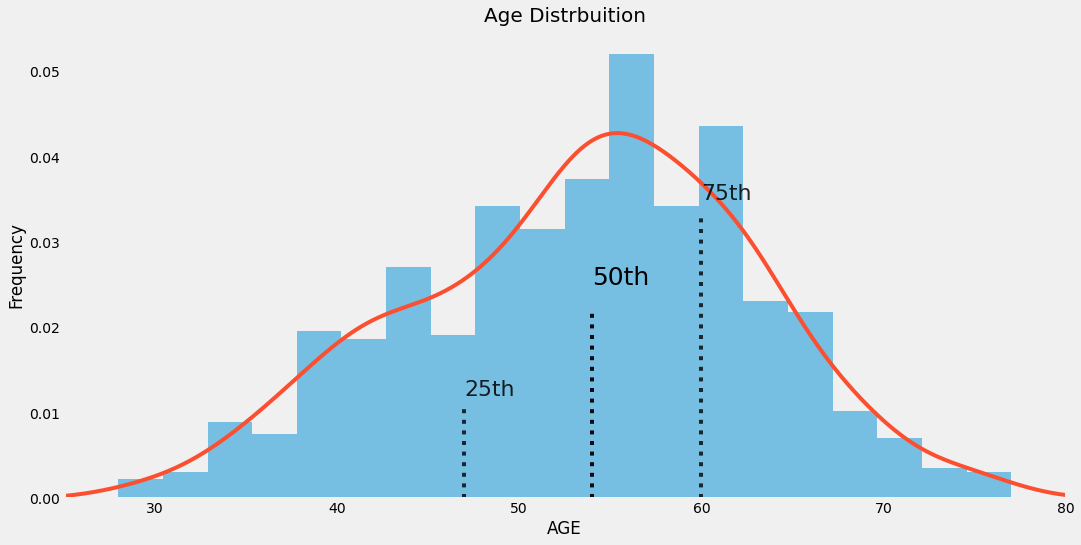

In [9]:
fig,ax = plt.subplots(figsize=(16,8))

df['Age'].plot(kind='hist',alpha=0.5,density=True,bins=20)
df['Age'].plot(kind='kde')

ax.set_xlabel('AGE')
ax.set_ylabel("Frequency")
ax.set_title('Age Distrbuition',size=20,pad=10)
ax.set_xlim(25,80)

quant25,quant50,quant75 = df['Age'].quantile(0.25),df['Age'].quantile(0.5),df['Age'].quantile(0.75)
quants = [[quant25,0.8,0.2],[quant50,0.95,0.4],[quant75,0.8,0.6]]
for i in quants:
    plt.axvline(x=i[0],alpha=i[1],ymax=i[2],linestyle=':',color='black')
    
ax.text(quant25, 0.012, "25th", size = 22, alpha = 0.85)
ax.text(quant50, 0.025, "50th", size = 25, alpha = 1)
ax.text(quant75, 0.035, "75th", size = 22, alpha = 0.85)

ax.grid(False)
plt.show()

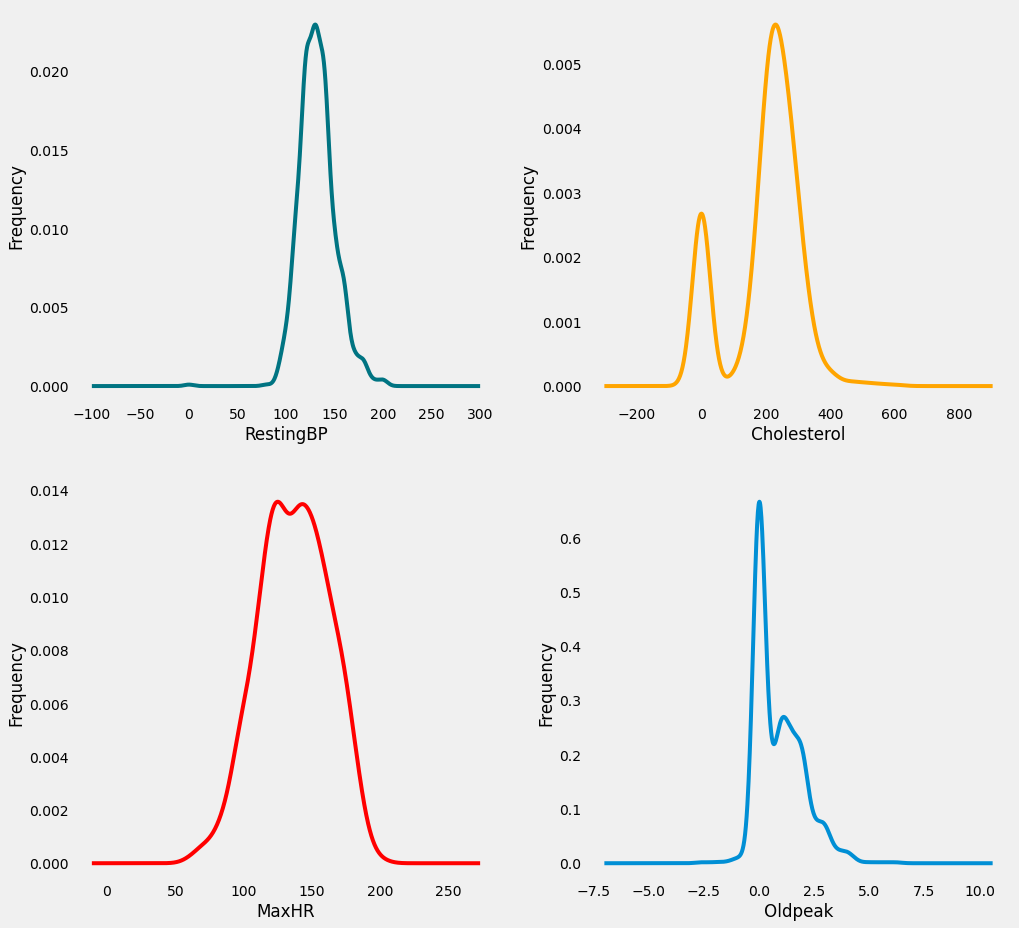

In [10]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
df['RestingBP'].plot(kind='density',color='#007482')
plt.xlabel('RestingBP')
plt.ylabel("Frequency")
plt.grid(False)

plt.subplot(2,2,2)
df['Cholesterol'].plot(kind='density',color='orange')
plt.xlabel('Cholesterol')
plt.ylabel("Frequency")
plt.grid(False)

plt.subplot(2,2,3)
df['MaxHR'].plot(kind='density',color='red')
plt.xlabel('MaxHR')
plt.ylabel("Frequency")
plt.grid(False)

plt.subplot(2,2,4)
df['Oldpeak'].plot(kind='density')
plt.xlabel('Oldpeak')
plt.ylabel("Frequency")
plt.grid(False)

plt.show()

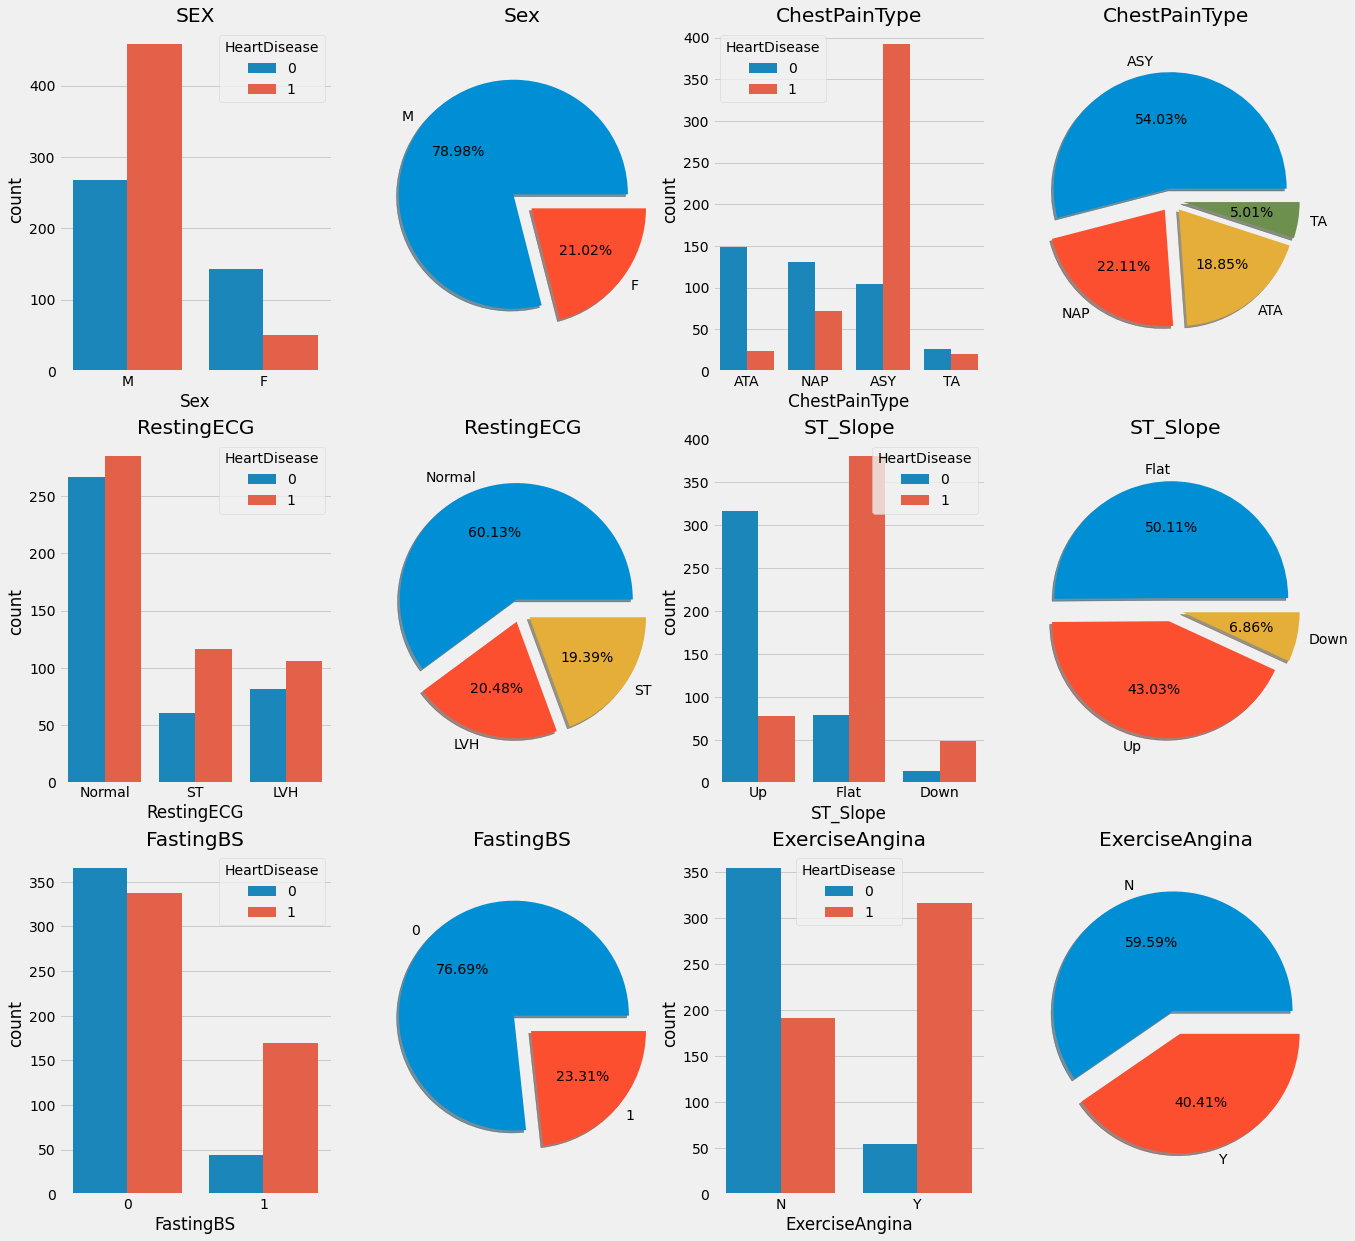

In [11]:
plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
sns.countplot(df.Sex,hue=df.HeartDisease)
plt.title('SEX') 

plt.subplot(3,4,2)
sex = df.Sex.value_counts()
plt.pie(sex,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=sex.index)
plt.title('Sex')
plt.axis('equal')

plt.subplot(3,4,3)
sns.countplot(df['ChestPainType'],hue=df.HeartDisease)
plt.title('ChestPainType') 

plt.subplot(3,4,4)
chest = df['ChestPainType'].value_counts()
plt.pie(chest,explode=[0.1,0.1,0.1,0.1],labels=chest.index,autopct='%.2f%%',shadow=True)
plt.title('ChestPainType')
plt.axis('equal')

plt.subplot(3,4,5)
sns.countplot(df['RestingECG'],hue=df.HeartDisease)
plt.title('RestingECG') 

plt.subplot(3,4,6)
ecg = df['RestingECG'].value_counts()
plt.pie(ecg,explode=[0.1,0.1,0.1],labels=ecg.index,autopct='%.2f%%',shadow=True)
plt.title('RestingECG')
plt.axis('equal')

plt.subplot(3,4,7)
sns.countplot(df.ST_Slope,hue=df.HeartDisease)
plt.title('ST_Slope') 

plt.subplot(3,4,8)
st = df.ST_Slope.value_counts()
plt.pie(st,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=st.index)
plt.title('ST_Slope')
plt.axis('equal')

plt.subplot(3,4,9)
sns.countplot(df['FastingBS'],hue=df.HeartDisease)
plt.title('FastingBS') 

plt.subplot(3,4,10)
fast = df['FastingBS'].value_counts()
plt.pie(fast,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=fast.index)
plt.title('FastingBS')
plt.axis('equal')

plt.subplot(3,4,11)
sns.countplot(df['ExerciseAngina'],hue=df.HeartDisease)
plt.title('ExerciseAngina')

plt.subplot(3,4,12)
ex =df['ExerciseAngina'].value_counts()
plt.pie(ex,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=ex.index)
plt.title('ExerciseAngina')
plt.axis('equal')

plt.show()

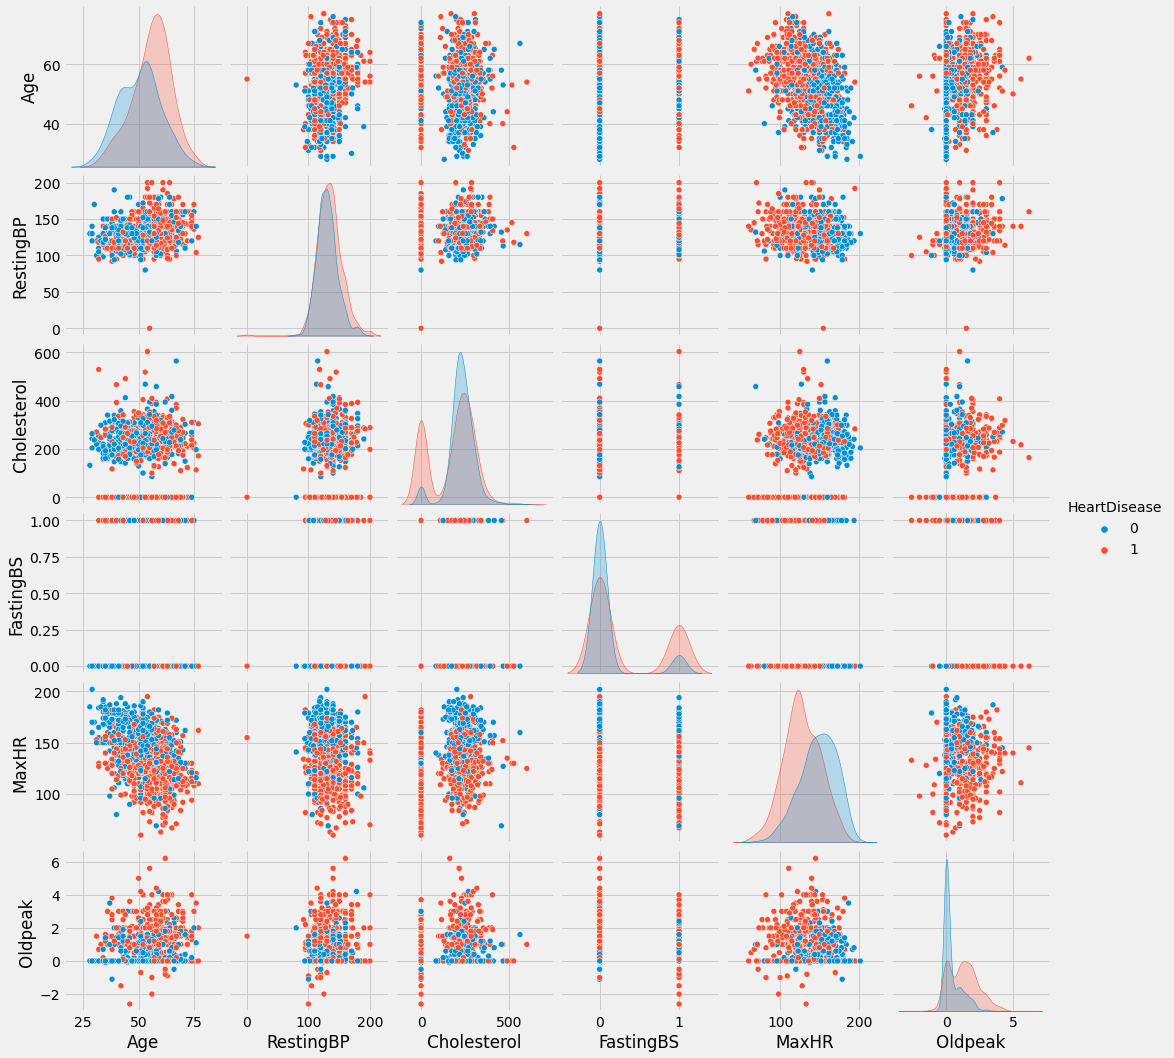

In [12]:
sns.pairplot(df,hue='HeartDisease')
plt.show()

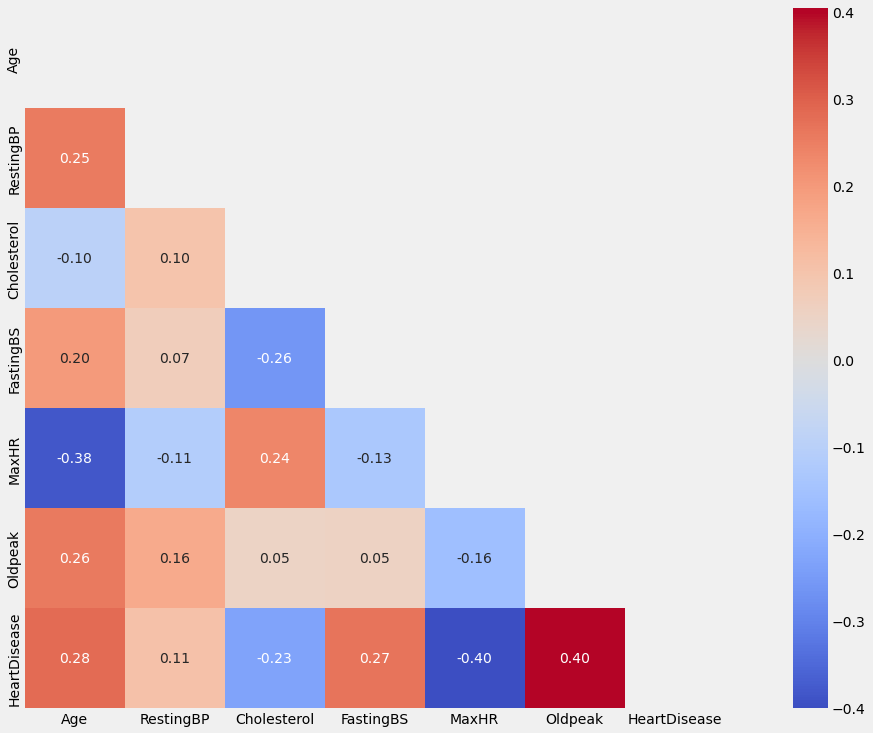

In [13]:
matrix = df.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()

# Preprocessing<a class="anchor" id="pp"></a>

### preprocessing for Tree-Based Models

In [14]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [15]:
X_tree,y_tree=df_tree.drop('HeartDisease',axis=1),df_tree['HeartDisease']
xtree_train, xtree_test, ytree_train, ytree_test = train_test_split(X_tree, y_tree, test_size=0.3)

### Preprocessing for None Tree-Based Models

In [16]:
str_col = [col for col in df.columns if df[col].dtype=='object']
df_nontree = pd.get_dummies(df,columns=str_col,drop_first=False)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [17]:
X_nontree,y_nontree=df_nontree.drop('HeartDisease',axis=1),df_nontree['HeartDisease']
xnontree_train, xnontree_test, ynontree_train, ynontree_test = train_test_split(X_nontree, y_nontree, test_size=0.3)

# Training Machine Learning Models<a class="anchor" id="ml"></a>



### NON-TREE BASED ALGORITHMS

***Logistic Regression***

In [18]:
kf = StratifiedKFold(n_splits=5)
log = make_pipeline(StandardScaler(),LogisticRegression())
log_score = cross_validate(log,X=xnontree_train,y=ynontree_train,cv=kf,scoring=['accuracy','roc_auc','recall','precision'])
log_score

{'fit_time': array([0.01196623, 0.01265407, 0.01260686, 0.01200318, 0.01195765]),
 'score_time': array([0.01155615, 0.00976682, 0.00961637, 0.00958729, 0.00993776]),
 'test_accuracy': array([0.88372093, 0.87596899, 0.8515625 , 0.8671875 , 0.828125  ]),
 'test_roc_auc': array([0.91471735, 0.93661972, 0.93921423, 0.91598715, 0.9271065 ]),
 'test_recall': array([0.91666667, 0.87323944, 0.88732394, 0.92957746, 0.81690141]),
 'test_precision': array([0.88      , 0.89855072, 0.85135135, 0.84615385, 0.86567164])}

***SVM***

In [19]:
kf = StratifiedKFold(n_splits=5)
svc = make_pipeline(StandardScaler(),SVC())
svc_para_grid = {'svc__kernel':['linear', 'poly', 'rbf']}
svc_grid = GridSearchCV(svc,param_grid=svc_para_grid,cv=kf,scoring='accuracy',return_train_score=True,refit=True)
svc_grid.fit(X=xnontree_train,y=ynontree_train)
svc_score=cross_validate(svc_grid,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
svc_score

{'fit_time': array([0.18095779, 0.1933012 , 0.18838072, 0.18919444, 0.1963048 ]),
 'score_time': array([0.00676227, 0.00632524, 0.00625372, 0.00682044, 0.00674057]),
 'test_accuracy': array([0.82945736, 0.89922481, 0.890625  , 0.8203125 , 0.8515625 ]),
 'test_recall': array([0.92857143, 0.92857143, 0.84285714, 0.82857143, 0.89855072]),
 'test_precision': array([0.79268293, 0.89041096, 0.9516129 , 0.84057971, 0.83783784]),
 'test_roc_auc': array([0.90968523, 0.96004843, 0.92857143, 0.908867  , 0.88970769])}

***K-nearest Neighbors***

In [20]:
kf = StratifiedKFold(n_splits=5)
kn = make_pipeline(StandardScaler(),KNeighborsClassifier())
kn_para_grid = {'kneighborsclassifier__n_neighbors':[4,8,16,32,64,128]}
kn_grid = GridSearchCV(kn,param_grid=kn_para_grid,cv=kf,scoring='accuracy',return_train_score=True,refit=True)
kn_grid.fit(X=xnontree_train,y=ynontree_train)
kn_score=cross_validate(kn_grid,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
kn_score

{'fit_time': array([0.88537574, 0.87654614, 0.88245344, 0.87833786, 0.87377596]),
 'score_time': array([0.01419806, 0.01431799, 0.01437902, 0.01333928, 0.01259041]),
 'test_accuracy': array([0.82170543, 0.88372093, 0.8515625 , 0.828125  , 0.8046875 ]),
 'test_recall': array([0.84285714, 0.85714286, 0.78571429, 0.82857143, 0.79710145]),
 'test_precision': array([0.83098592, 0.92307692, 0.93220339, 0.85294118, 0.83333333]),
 'test_roc_auc': array([0.88692494, 0.95835351, 0.93251232, 0.90270936, 0.8712847 ])}

### TREE BASED ALGORITHMS


***Decission tree Classifier***

In [21]:
kf = StratifiedKFold(n_splits=5)
dtree = DecisionTreeClassifier()
dtree_score=cross_validate(dtree,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
dtree_score

{'fit_time': array([0.00345993, 0.00293803, 0.00281644, 0.00276017, 0.00276899]),
 'score_time': array([0.00599527, 0.00459743, 0.00472784, 0.0046885 , 0.00458145]),
 'test_accuracy': array([0.71317829, 0.86821705, 0.796875  , 0.75      , 0.765625  ]),
 'test_recall': array([0.8       , 0.87142857, 0.72857143, 0.74285714, 0.8115942 ]),
 'test_precision': array([0.70886076, 0.88405797, 0.87931034, 0.78787879, 0.76712329]),
 'test_roc_auc': array([0.70508475, 0.86791768, 0.80394089, 0.75073892, 0.7617293 ])}

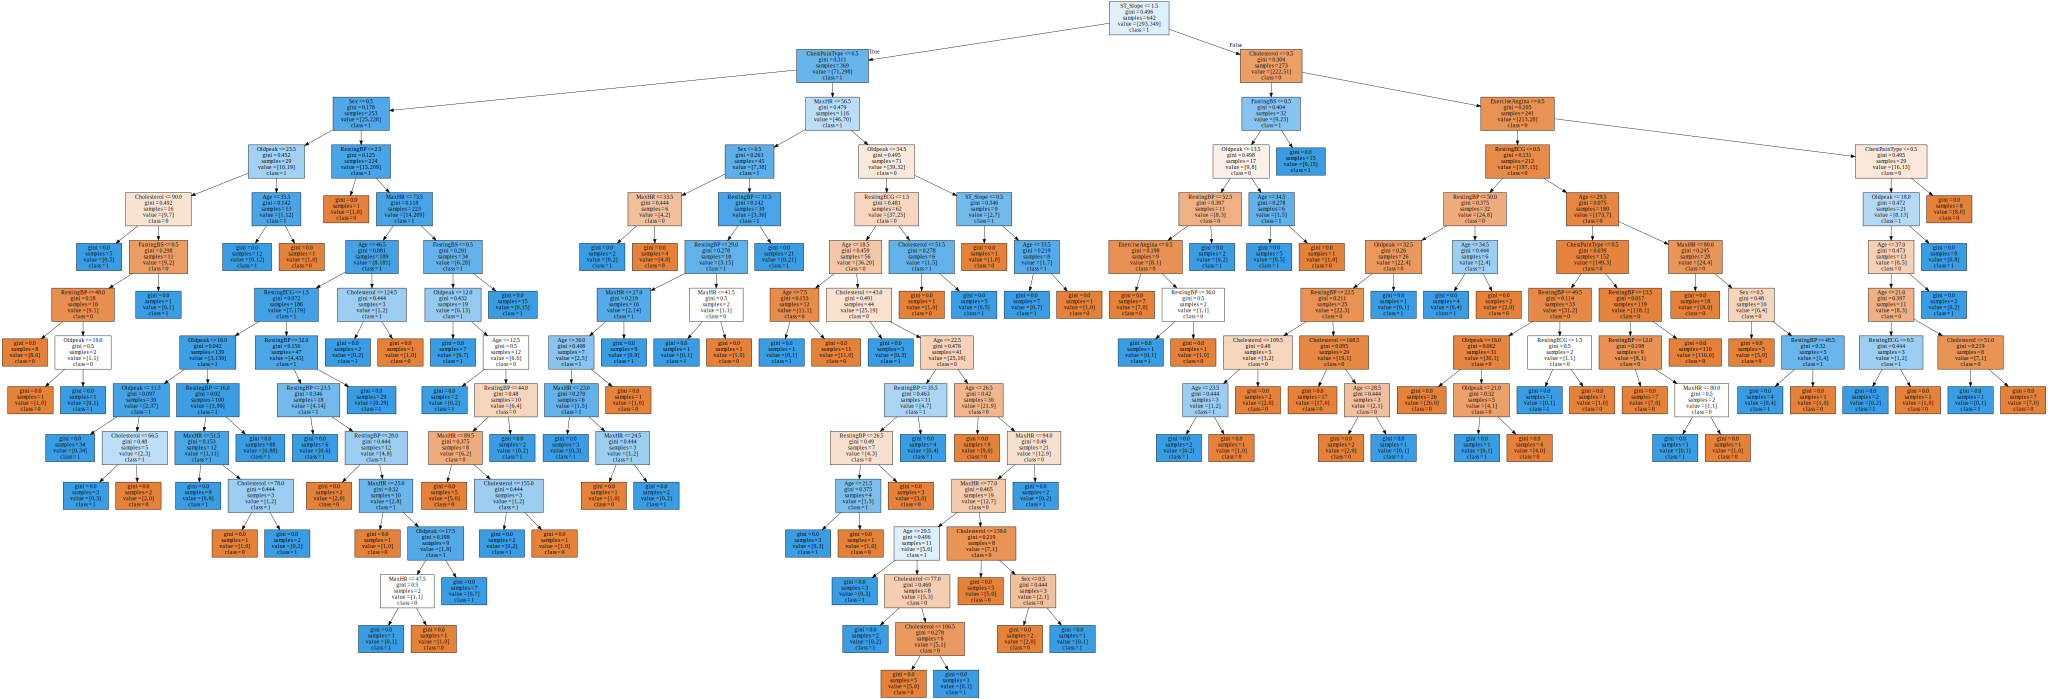

In [22]:
dtree = dtree.fit(xtree_train,ytree_train)
dot_data = export_graphviz(dtree,feature_names=xtree_train.columns,
                           class_names=['0','1'],filled=True,out_file=None)
graph = graphviz.Source(dot_data,format='png')
graph

***Random Forest Classifier***

In [23]:
kf = StratifiedKFold(n_splits=5)
rfor = RandomForestClassifier(n_estimators=200)
rfor_score = cross_validate(rfor,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
rfor_score

{'fit_time': array([0.35380912, 0.35257626, 0.34828186, 0.34448647, 0.34367728]),
 'score_time': array([0.03778839, 0.03718972, 0.03644228, 0.03652859, 0.03760004]),
 'test_accuracy': array([0.85271318, 0.90697674, 0.875     , 0.8203125 , 0.8359375 ]),
 'test_recall': array([0.91428571, 0.91428571, 0.85714286, 0.84285714, 0.89855072]),
 'test_precision': array([0.83116883, 0.91428571, 0.90909091, 0.83098592, 0.81578947]),
 'test_roc_auc': array([0.90024213, 0.96283293, 0.95036946, 0.9067734 , 0.89032179])}

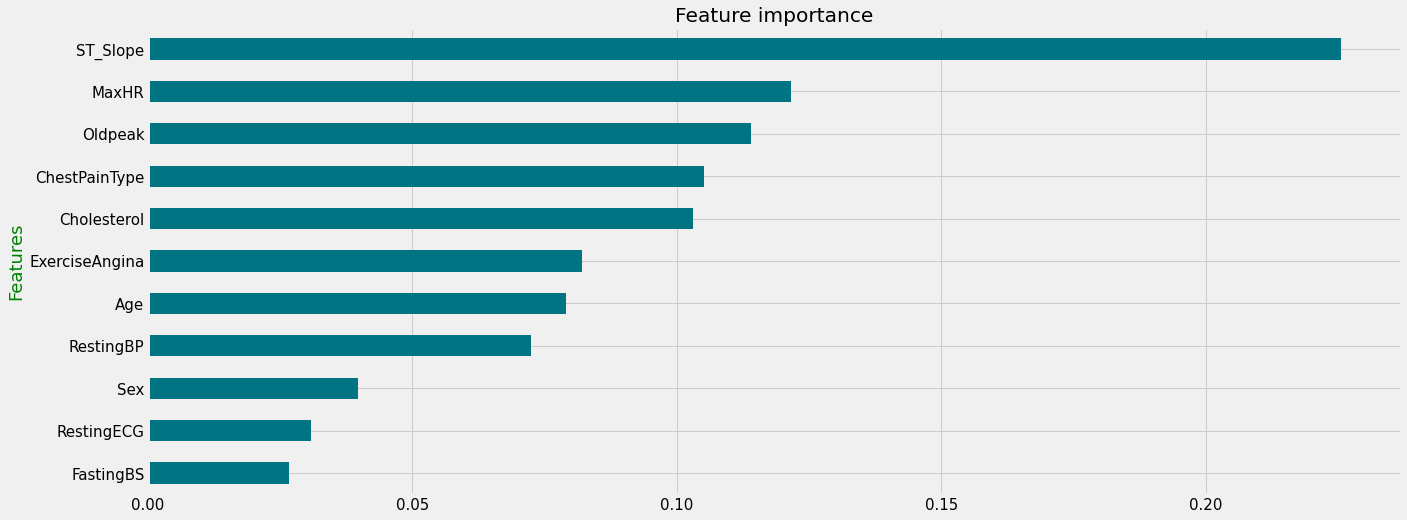

In [24]:
# Checking Feature importance 
rfor.fit(xtree_train,ytree_train)
importance = pd.Series(rfor.feature_importances_,index=xtree_train.columns).sort_values()

#initializing plot
ax = importance.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Feature importance')

#x-label
ax.set_ylabel('Features', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(20, 8)

#shwoing the plot
plt.show()

***XGBoost***

In [25]:
kf = StratifiedKFold(n_splits=5)
xgb = XGBClassifier()
xgb_score = cross_validate(xgb,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
xgb_score

[17:21:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

{'fit_time': array([0.74582839, 0.47868133, 0.07013178, 0.06847143, 0.06909156]),
 'score_time': array([0.0151    , 0.00919056, 0.00806975, 0.00779986, 0.00808501]),
 'test_accuracy': array([0.87596899, 0.89147287, 0.8984375 , 0.8046875 , 0.796875  ]),
 'test_recall': array([0.92857143, 0.9       , 0.87142857, 0.84285714, 0.86956522]),
 'test_precision': array([0.85526316, 0.9       , 0.93846154, 0.80821918, 0.77922078]),
 'test_roc_auc': array([0.89152542, 0.9622276 , 0.92955665, 0.89630542, 0.86710882])}

[17:21:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


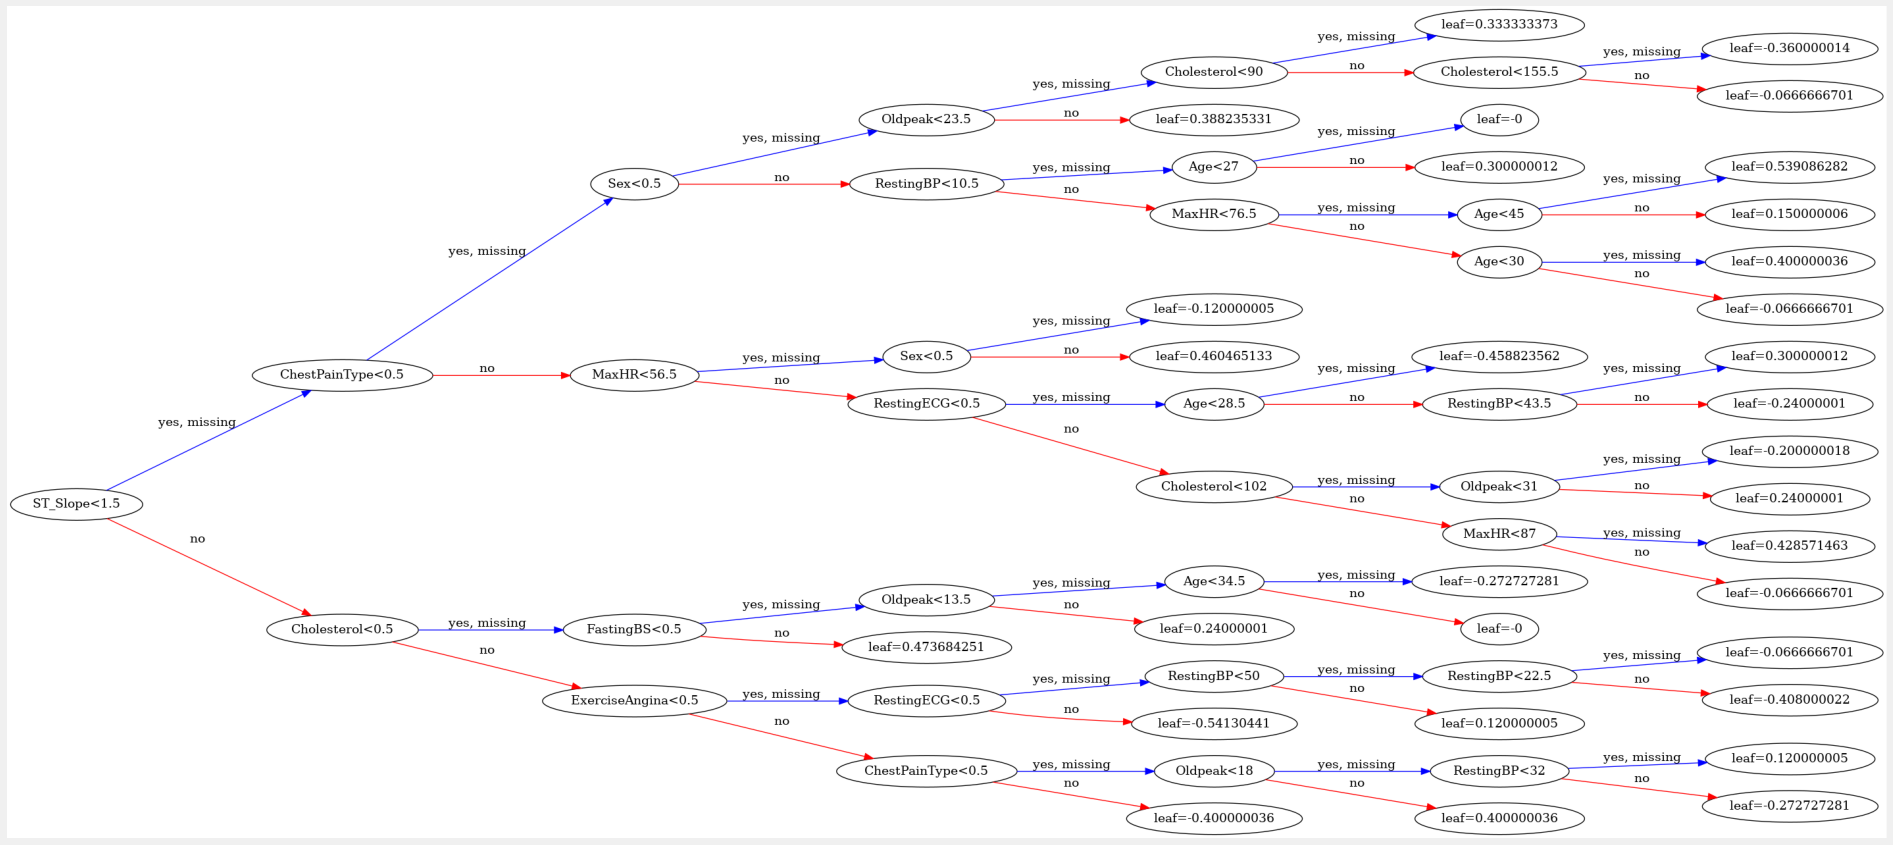

In [26]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.fit(xtree_train,ytree_train)
plot_tree(xgb,num_trees=0,rankdir="LR",ax=ax)
plt.show()

***LightGBM***

In [27]:
kf = StratifiedKFold(n_splits=5)
lgb = LGBMClassifier()
lgb_score = cross_validate(lgb,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
lgb_score

{'fit_time': array([0.05019021, 0.04163003, 0.04405761, 0.03963184, 0.04562187]),
 'score_time': array([0.00802875, 0.0073061 , 0.00693107, 0.00711203, 0.00707269]),
 'test_accuracy': array([0.86821705, 0.88372093, 0.875     , 0.84375   , 0.796875  ]),
 'test_recall': array([0.92857143, 0.87142857, 0.8       , 0.85714286, 0.86956522]),
 'test_precision': array([0.84415584, 0.91044776, 0.96551724, 0.85714286, 0.77922078]),
 'test_roc_auc': array([0.88595642, 0.9527845 , 0.94285714, 0.90566502, 0.87079342])}

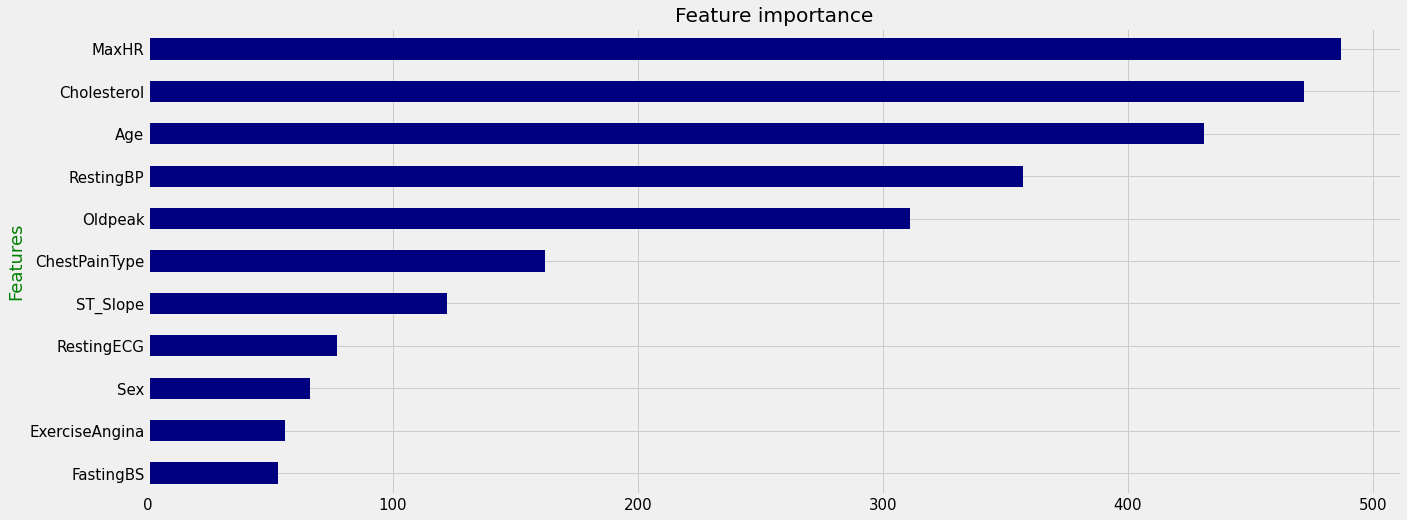

In [28]:
# Checking Feature importance 
lgb.fit(xtree_train,ytree_train)
importance = pd.Series(lgb.feature_importances_,index=xtree_train.columns).sort_values()

#initializing plot
ax = importance.plot.barh(color = 'navy', fontsize = 15)

#giving a title
ax.set(title = 'Feature importance')

#x-label
ax.set_ylabel('Features', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(20, 8)

#shwoing the plot
plt.show()

***Catboost***

In [29]:
kf = StratifiedKFold(n_splits=5)
cat = CatBoostClassifier(verbose=0)
cat_score = cross_validate(cat,X=xtree_train,y=ytree_train,cv=kf,scoring=['accuracy','recall','precision','roc_auc'])
cat_score

{'fit_time': array([0.84298348, 0.7918725 , 0.7830503 , 0.78325748, 0.80716658]),
 'score_time': array([0.00546312, 0.00526953, 0.00534678, 0.00539374, 0.00535345]),
 'test_accuracy': array([0.87596899, 0.90697674, 0.875     , 0.859375  , 0.8203125 ]),
 'test_recall': array([0.94285714, 0.92857143, 0.84285714, 0.88571429, 0.88405797]),
 'test_precision': array([0.84615385, 0.90277778, 0.921875  , 0.86111111, 0.80263158]),
 'test_roc_auc': array([0.91210654, 0.96900726, 0.95640394, 0.9135468 , 0.89191845])}

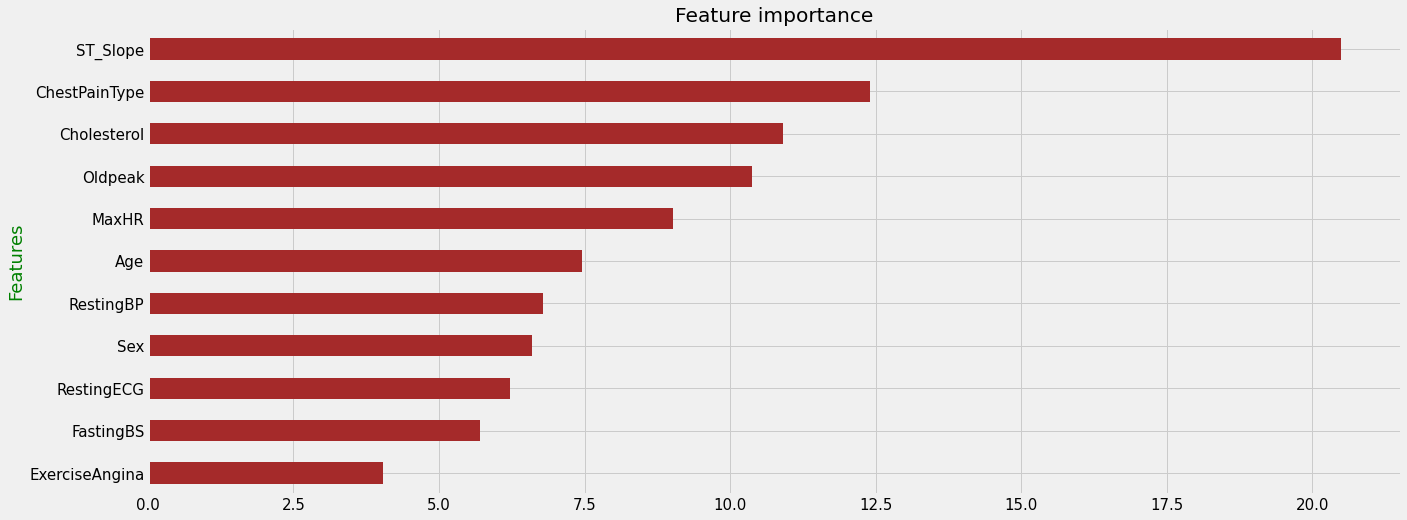

In [30]:
# Checking Feature importance 
cat.fit(xtree_train,ytree_train)
importance = pd.Series(cat.feature_importances_,index=xtree_train.columns).sort_values()

#initializing plot
ax = importance.plot.barh(color = 'brown', fontsize = 15)

#giving a title
ax.set(title = 'Feature importance')

#x-label
ax.set_ylabel('Features', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(20, 8)

#shwoing the plot
plt.show()

# Model Comparison<a class="anchor" id="mc"></a>

In [31]:
log_score = pd.DataFrame(log_score).mean()
svc_score = pd.DataFrame(svc_score).mean()
kn_score = pd.DataFrame(kn_score).mean()
dtree_score = pd.DataFrame(dtree_score).mean()
rfor_score = pd.DataFrame(rfor_score).mean()
xgb_score = pd.DataFrame(xgb_score).mean()
lgb_score = pd.DataFrame(lgb_score).mean()
cat_score = pd.DataFrame(cat_score).mean()

models_score= pd.DataFrame(index=['LogisticRegression','SVC','KNN','DTree','RForest','XGBClassifier','LGBMClassifier','CatBoostClassifier'],
                        data= [log_score,svc_score,kn_score,dtree_score,rfor_score,xgb_score,lgb_score,cat_score]
                           ).drop(['fit_time','score_time'],axis=1).rename(columns={'test_accuracy':'accuracy','test_roc_auc':'roc_auc','test_recall':'recall'
                                                                                    ,'test_precision':'precision'}).sort_values('accuracy',ascending=False)
models_score.style.background_gradient(cmap='binary')

,accuracy,roc_auc,recall,precision
CatBoostClassifier,0.867527,0.928597,0.896812,0.866910
LogisticRegression,0.861313,0.926729,0.884742,0.868346
SVC,0.858236,0.919376,0.885424,0.862625
RForest,0.858188,0.922108,0.885424,0.860264
LGBMClassifier,0.853513,0.911611,0.865342,0.871297
XGBClassifier,0.853488,0.909345,0.882484,0.856233
KNN,0.837960,0.910357,0.822277,0.874508
DTree,0.778779,0.777882,0.790890,0.805446


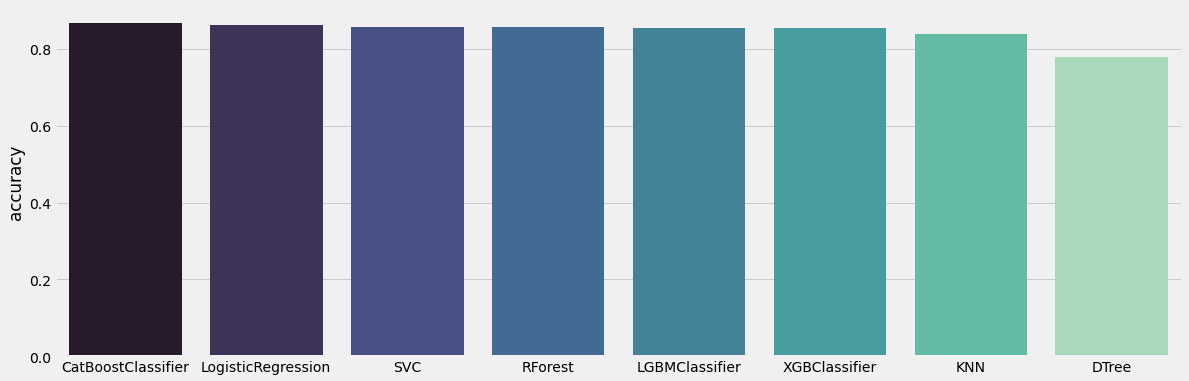

In [32]:
plt.figure(figsize=(18,6))
sns.barplot(x=models_score.index,y=models_score['accuracy'],palette='mako')
plt.show()

# HyperParameter Tuning<a class="anchor" id="ht"></a>
* hyperparameter tuning for the best model ***Catboost***





***Catboost HyperParameter Tuning with Optuna***

source --> https://github.com/optuna/optuna-examples/blob/main/catboost/catboost_simple.py

In [33]:
def objective(trial):

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = CatBoostClassifier(**param)

    gbm.fit(xtree_train, ytree_train, eval_set=[(xtree_test, ytree_test)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(xtree_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(ytree_test, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2022-03-05 17:21:34,403] A new study created in memory with name: no-name-469ee1d1-de57-4326-bc53-60b1d945d913
[I 2022-03-05 17:21:35,540] Trial 0 finished with value: 0.8804347826086957 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09694183460871535, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.8804347826086957.
[I 2022-03-05 17:21:35,871] Trial 1 finished with value: 0.8840579710144928 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07973574735031962, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.8840579710144928.
[I 2022-03-05 17:21:36,864] Trial 2 finished with value: 0.8840579710144928 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06391090151868146, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.8840579710144928.
[I 2022-03-05 17:21:37,117] Trial 3 finished with value: 0.88405

Number of finished trials: 100
Best trial:
  Value: 0.894927536231884
  Params: 
    objective: CrossEntropy
    colsample_bylevel: 0.09063728935221103
    depth: 6
    boosting_type: Plain
    bootstrap_type: Bernoulli
    subsample: 0.552173766249741


# Evaluating the performance of the model<a class="anchor" id="ev"></a>
* Evaluating the best model ***Catboost***





In [36]:
model = CatBoostClassifier(objective='CrossEntropy',colsample_bylevel=0.09063728935221103,
                          depth=6,boosting_type='Plain',bootstrap_type='Bernoulli',
                          subsample=0.552173766249741,verbose=0)
model.fit(xtree_train,ytree_train)
y_pred = model.predict(xtree_test)

***Accuracy***

In [37]:
print('Train Accuracy:--> {}%'.format(np.round(accuracy_score(ytree_train,model.predict(xtree_train))*100)))
print('Test Accuracy:--> {}%'.format(np.round(accuracy_score(ytree_test,y_pred)*100)))

Train Accuracy:--> 93.0%
Test Accuracy:--> 88.0%


***Classification Report***

In [38]:
print(classification_report(ytree_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       117
           1       0.90      0.89      0.89       159

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



***Confusion Metrics***

In [39]:
print(confusion_matrix(ytree_test,y_pred))

[[101  16]
 [ 18 141]]


***AUC***

In [40]:
print(roc_auc_score(ytree_test,y_pred))

0.875020158039026
